<a href="https://colab.research.google.com/github/doryunnim/machinelearning/blob/ready/raedy_ipyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
print(np.__version__)

my_arr = np.array([[10, 20, 30], [40, 50, 60]])
print(my_arr)
print(type(my_arr))
print(my_arr[0][2])
print(np.sum(my_arr))
# 마지막 줄은 print() 함수를 사용하지 않아도 자동으로 결과가 출력된다.

1.17.5
[[10 20 30]
 [40 50 60]]
<class 'numpy.ndarray'>
30
210


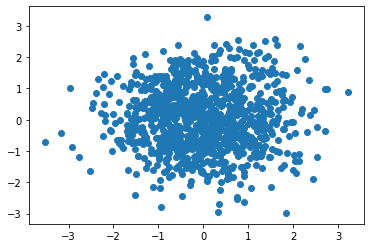

In [22]:
import matplotlib.pyplot as plt

# plt.plot([1, 2, 3, 4, 5], [1, 4, 9, 16 ,25])
# plt.show()

# plt.scatter([1, 2, 3, 4, 5], [1, 4, 9, 16, 25])
# plt.show()

x = np.random.randn(1000)
y = np.random.randn(1000)
plt.scatter(x, y)
plt.show()

선형 회귀는 머신러닝 알고리즘 중 하나입니다.


(442, 10) (442,)
[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567061 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286377 -0.02593034]]


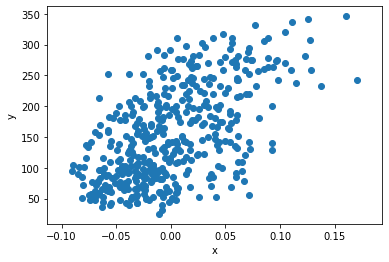

In [1]:
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
diabetes = load_diabetes()
print(diabetes.data.shape, diabetes.target.shape)
# print(diabetes.data[0:3])

plt.scatter(diabetes.data[:, 2], diabetes.target)
plt.xlabel('x')
plt.ylabel('y')
plt.show()